In [31]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\ronal\appdata\local\programs\python\python312\lib\site-packages (0.13.2)




[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

### Ex. 1

In [12]:
# Leitura do arquivo
df_vendas_itens = pd.read_excel('../modulo5/data/Online Retail.xlsx')
# Um pouquinho de engenharia de atributos
# Apagando os NaNs
df_vendas_itens.dropna(inplace=True)
# Conversão de tipos
df_vendas_itens.CustomerID = df_vendas_itens.CustomerID.astype(int)
# Criação da data para agrupamento. :)
df_vendas_itens['mes_compra'] = df_vendas_itens.InvoiceDate.dt.strftime('%Y-%m')
# Calculando o total da venda
df_vendas_itens['total'] = df_vendas_itens['Quantity'] * df_vendas_itens['UnitPrice']
# Removendo totais negativos
df_vendas_itens = df_vendas_itens[df_vendas_itens['total']>0]
# Reorganizando as colunas
df_vendas_itens.columns = ['venda_id', 'produto_id', 'descricao', 'quantidade', 'data_venda',
                            'preco', 'cliente_id', 'cliente_pais', 'mes_venda', 'total']
df_vendas_itens = df_vendas_itens[['venda_id', 'mes_venda', 'data_venda', 'cliente_id',
                                   'cliente_pais', 'produto_id', 'descricao', 'quantidade',
                                   'preco', 'total']]

print(df_vendas_itens.dtypes)
print(df_vendas_itens.shape)

venda_id                object
mes_venda               object
data_venda      datetime64[ns]
cliente_id               int32
cliente_pais            object
produto_id              object
descricao               object
quantidade               int64
preco                  float64
total                  float64
dtype: object
(397884, 10)


### Ex. 2

In [13]:
df_vendas_itens

,venda_id,mes_venda,data_venda,cliente_id,cliente_pais,produto_id,descricao,quantidade,preco,total
0,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,71053,WHITE METAL LANTERN,6,3.39,20.34
2,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,536365,2010-12,2010-12-01 08:26:00,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12,2011-12-09 12:50:00,12680,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20
541905,581587,2011-12,2011-12-09 12:50:00,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60
541906,581587,2011-12,2011-12-09 12:50:00,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60
541907,581587,2011-12,2011-12-09 12:50:00,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60


### Ex. 3

In [14]:
df_vendas_itens.mes_venda.value_counts().sort_index()

mes_venda
2010-12    26157
2011-01    21229
2011-02    19927
2011-03    27175
2011-04    22642
2011-05    28320
2011-06    27185
2011-07    26825
2011-08    27007
2011-09    40028
2011-10    49554
2011-11    64531
2011-12    17304
Name: count, dtype: int64

### Ex. 4

In [17]:
# Agrupamento para criação da venda
df_vendas = df_vendas_itens.groupby(['mes_venda', 'cliente_id',
                                      'cliente_pais', 'venda_id'])\
                            .agg({'total':['count', np.sum]})

# Organizando os indices
df_vendas = df_vendas.sort_index().reset_index()
# Organizando as colunas
df_vendas.columns=['mes_venda', 'cliente_id', 'cliente_pais', 'venda_id',
                   'qtde_itens', 'valor_venda']

# Vamos remover o mes que está incompleto
df_vendas = df_vendas[df_vendas['mes_venda']!='2011-12']
print(df_vendas.dtypes)

mes_venda        object
cliente_id        int32
cliente_pais     object
venda_id          int64
qtde_itens        int64
valor_venda     float64
dtype: object


C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\2603941686.py:4: FutureWarning: The provided callable <function sum at 0x0000012A2A517560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'total':['count', np.sum]})


### Ex. 5

In [18]:
df_vendas.mes_venda.value_counts()

mes_venda
2011-11    2657
2011-10    1929
2011-09    1755
2011-05    1555
2010-12    1400
2011-06    1393
2011-07    1331
2011-03    1321
2011-08    1280
2011-04    1149
2011-02     997
2011-01     987
Name: count, dtype: int64

### Ex. 6

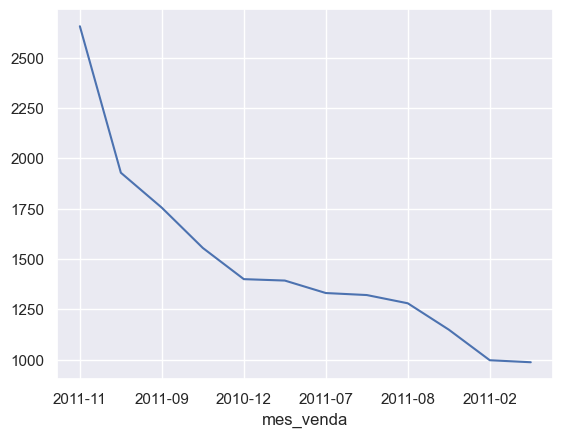

In [33]:
df_vendas.mes_venda.value_counts().plot()
plt.show()

### Ex. 7

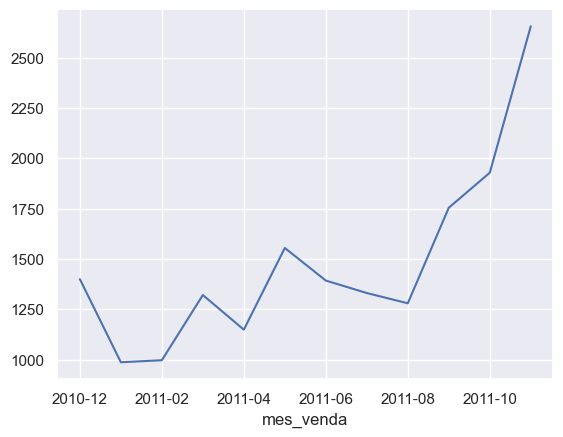

In [34]:
df_vendas.mes_venda.value_counts().sort_index().plot()
plt.show()

### Ex. 8

In [35]:
df_vendas_mes = df_vendas.mes_venda.value_counts().sort_index()\
    .rename_axis('mes_venda').reset_index(name='qtde_vendas')
print (df_vendas_mes)

   mes_venda  qtde_vendas
0    2010-12         1400
1    2011-01          987
2    2011-02          997
3    2011-03         1321
4    2011-04         1149
5    2011-05         1555
6    2011-06         1393
7    2011-07         1331
8    2011-08         1280
9    2011-09         1755
10   2011-10         1929
11   2011-11         2657


### Ex. 9

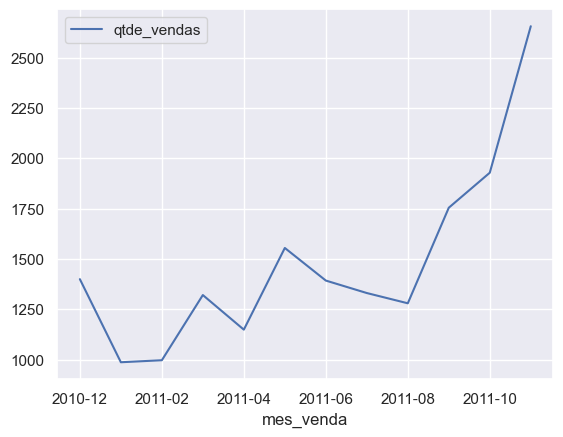

In [36]:
df_vendas_mes.plot(x='mes_venda')
plt.show()

### Ex. 10

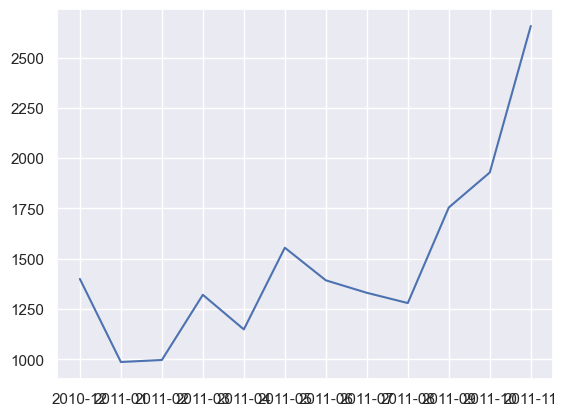

In [37]:
plt.plot(df_vendas_mes['mes_venda'],
         df_vendas_mes['qtde_vendas'])
plt.show()

### Ex. 11

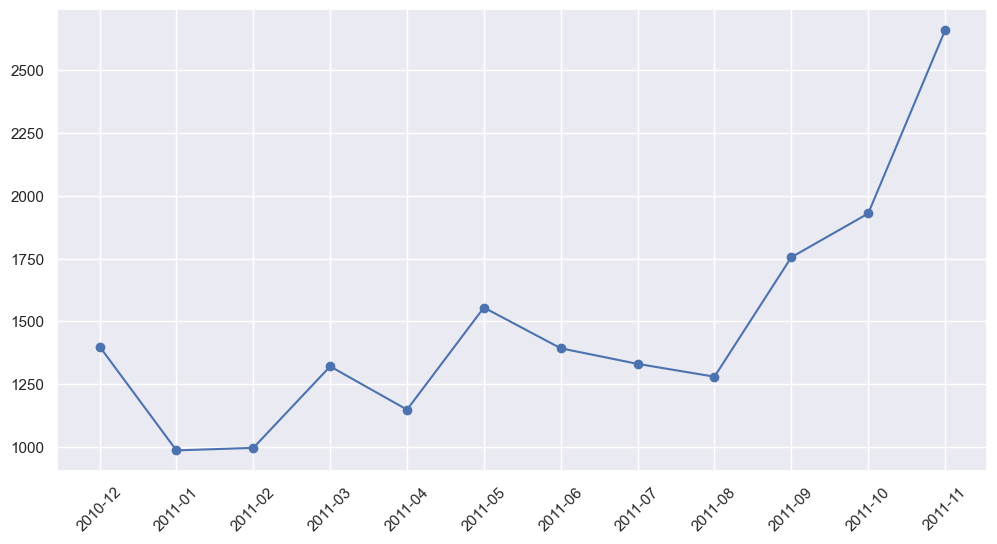

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'], marker='o')
plt.xticks(rotation = 45)
plt.show()

### Ex. 12

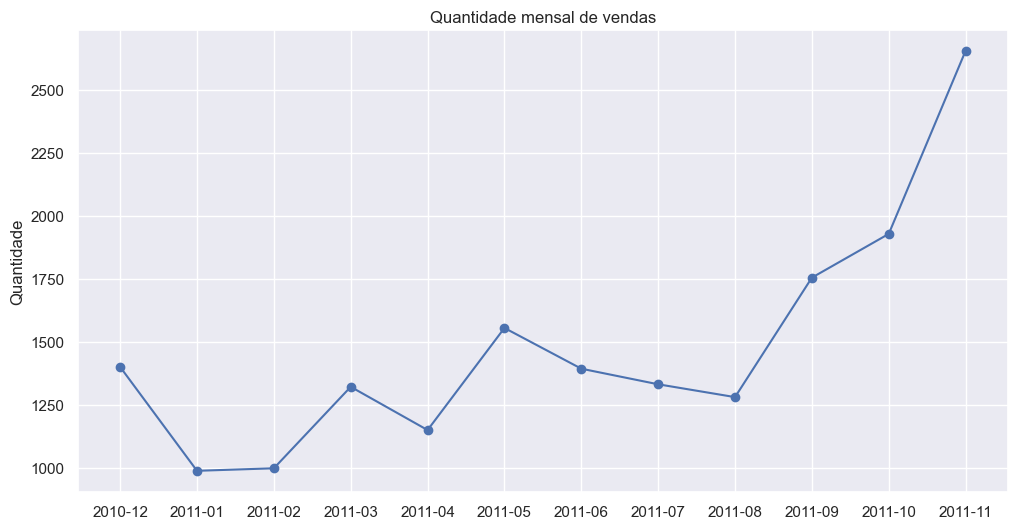

In [39]:
plt.figure(figsize=(12, 6))
plt.title('Quantidade mensal de vendas')
plt.ylabel('Quantidade')
plt.plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'], marker='o')
plt.show()

### Ex. 13

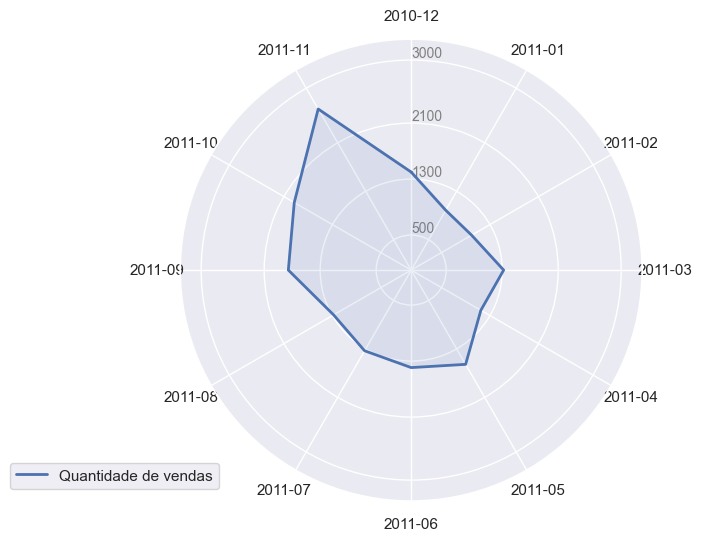

In [40]:
from math import pi

plt.figure(figsize=(12, 6))
# Número de periodos
categories = df_vendas_mes['mes_venda']
N = len(categories)

# Qual será o ângulo de cada eixo do gráfico? #(dividimos o gráfico / número do meses)
angles = [n / float(N) * 2 * pi for n in range(N)]
# Fechando o círculo
angles += angles[:1]

# Inicialização do gráfico
ax = plt.subplot(111, polar=True)

# Se você quiser que o primeiro eixo fique no topo:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Definição de marcadores e rótulos do eixo X
plt.xticks(angles[:-1], categories)

# Definições do eixo Y
ax.set_rlabel_position(0)
plt.yticks([500, 1300, 2100, 3000], color="grey", size=10)
plt.ylim(0,3300)

#'Quantidade de vendas'
values=df_vendas_mes['qtde_vendas'].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, label='Quantidade de vendas')
ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(bbox_to_anchor=(0.1, 0.1))
plt.show()

### Ex. 14

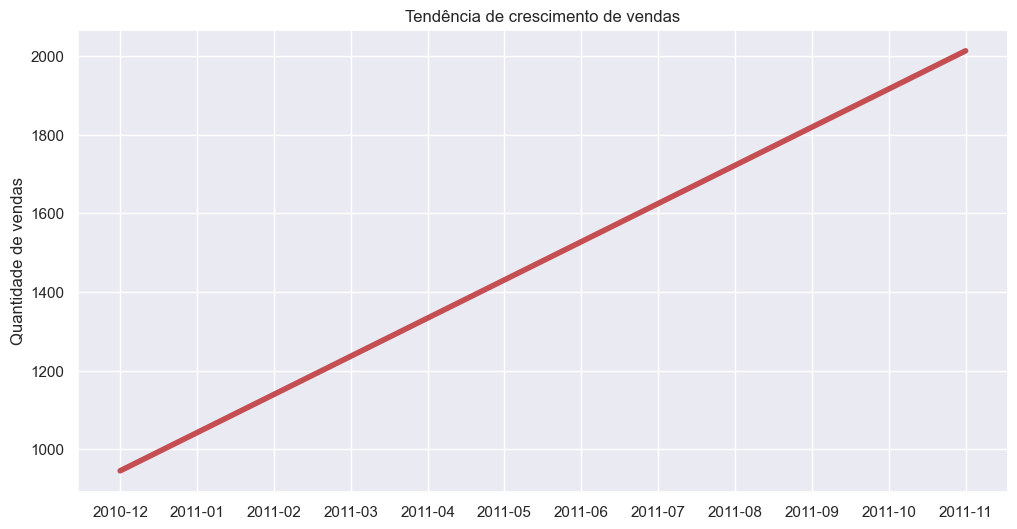

In [41]:
plt.figure(figsize=(12, 6))
plt.title('Tendência de crescimento de vendas')
plt.ylabel('Quantidade de vendas')

# Cálculo da tendência
x, y = range(0,12), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'], 1)
p = np.poly1d(z)

plt.plot(df_vendas_mes['mes_venda'], p(x), c='r', linewidth = 4)
plt.show()

### Ex. 15

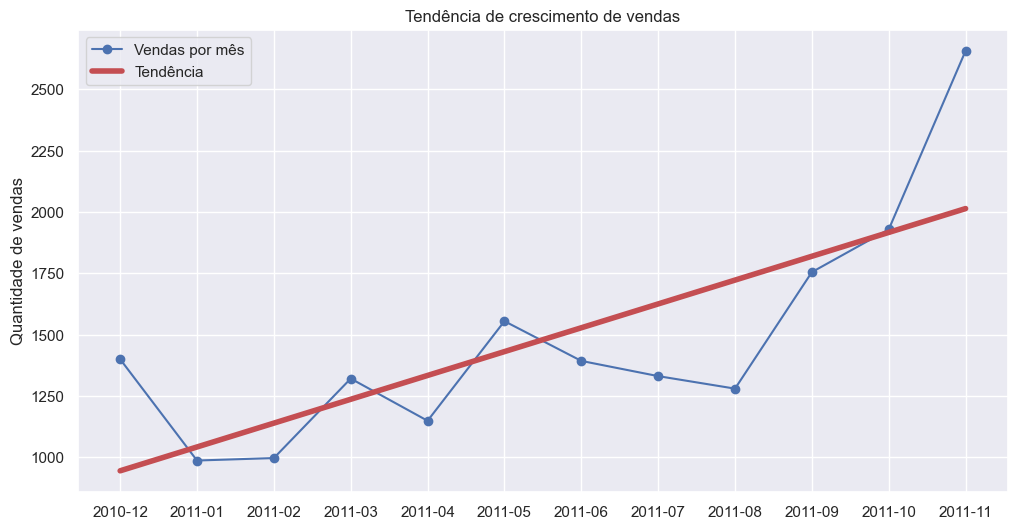

In [42]:
plt.figure(figsize=(12, 6))
plt.title('Tendência de crescimento de vendas')
plt.ylabel('Quantidade de vendas')

# Cálculo da tendência
x, y = range(0,12), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'], 1)
p = np.poly1d(z)

plt.plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'], marker='o', label='Vendas por mês')
plt.plot(df_vendas_mes['mes_venda'], p(x), c='r', linewidth = 4, label='Tendência')
plt.legend()
plt.show()

### Ex. 16

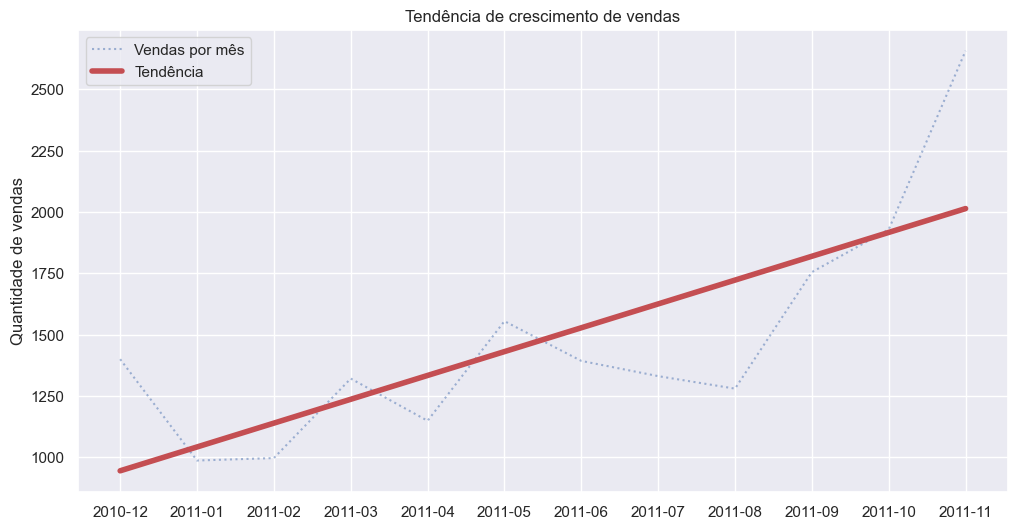

In [43]:
plt.figure(figsize=(12, 6))
plt.title('Tendência de crescimento de vendas')
plt.ylabel('Quantidade de vendas')

# Cálculo da tendência
x, y = range(0,12), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'], 1)
p = np.poly1d(z)

plt.plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'], alpha=.5, label='Vendas por mês', ls=':')
plt.plot(df_vendas_mes['mes_venda'], p(x), c='r', linewidth = 4, label='Tendência')
plt.legend()
plt.show()

### Ex. 17

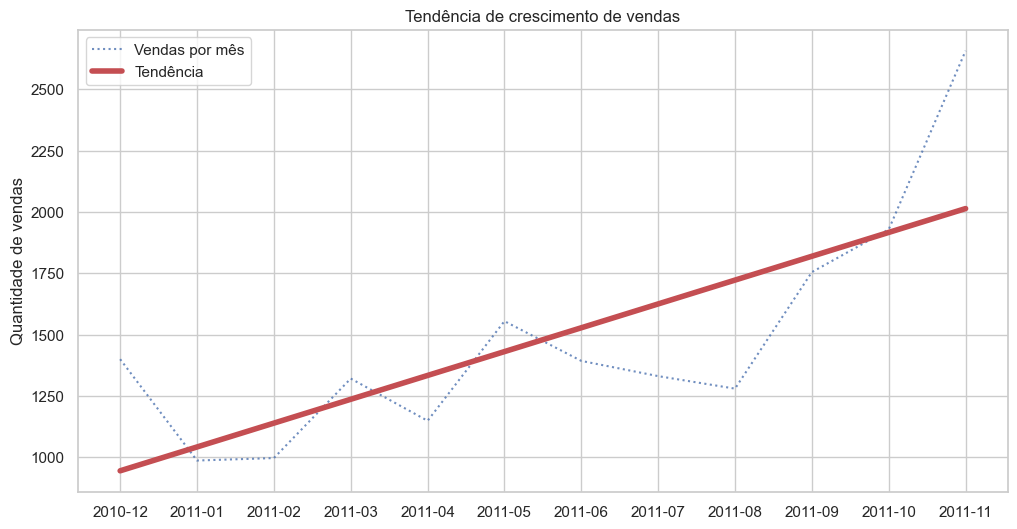

In [44]:
sns.set_style("whitegrid") # darkgrid, whitegrid, dark, white, ticks
plt.figure(figsize=(12, 6))
plt.title('Tendência de crescimento de vendas')
plt.ylabel('Quantidade de vendas')

# Cálculo da tendência
x, y = range(0,12), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'], 1)
p = np.poly1d(z)

plt.plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'], ls=':', alpha=.8, label='Vendas por mês')
plt.plot(df_vendas_mes['mes_venda'], p(x), c='r', linewidth = 4, label='Tendência')
plt.legend()
plt.show()

### Ex. 18

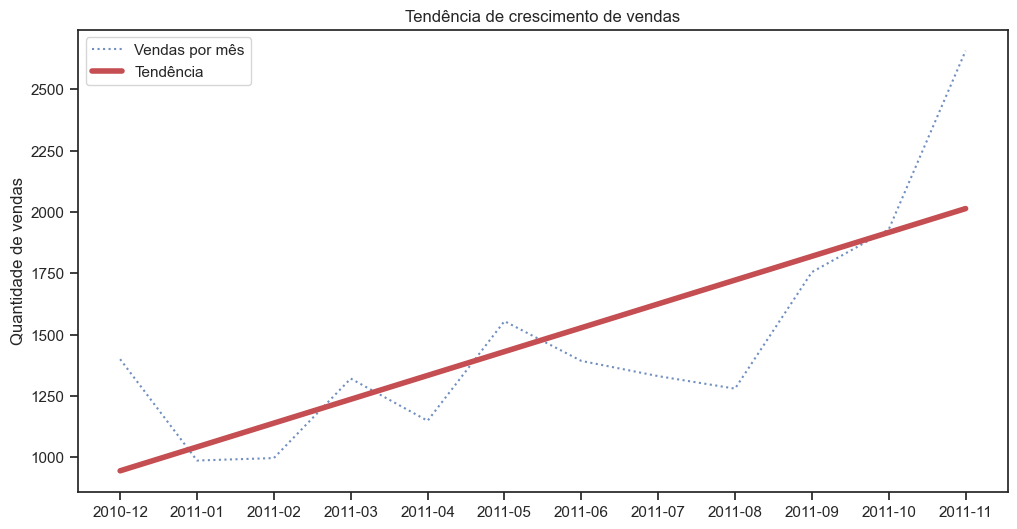

In [45]:
sns.set_style("ticks") # darkgrid, whitegrid, dark, white, ticks
plt.figure(figsize=(12, 6))
plt.title('Tendência de crescimento de vendas')
plt.ylabel('Quantidade de vendas')

# Cálculo da tendência
x, y = range(0,12), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'], 1)
p = np.poly1d(z)

plt.plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'], ls=':', alpha=.8, label='Vendas por mês')
plt.plot(df_vendas_mes['mes_venda'], p(x), c='r', linewidth = 4, label='Tendência')
plt.legend()
plt.show()

### Ex. 19

In [50]:
sns.set_theme()
df_vendas_mes = df_vendas.groupby('mes_venda')\
    .agg({'valor_venda': [len, np.sum, np.mean]})\
    .sort_index().reset_index()
df_vendas_mes.columns = ['mes_venda', 'qtde_vendas',
                           'valor_total', 'ticket_medio']
df_vendas_mes

C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\192748922.py:3: FutureWarning: The provided callable <function sum at 0x0000012A2A517560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'valor_venda': [len, np.sum, np.mean]})\
C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\192748922.py:3: FutureWarning: The provided callable <function mean at 0x0000012A2A524680> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg({'valor_venda': [len, np.sum, np.mean]})\


,mes_venda,qtde_vendas,valor_total,ticket_medio
0,2010-12,1400,572713.890,409.081350
1,2011-01,987,569445.040,576.945329
2,2011-02,997,447137.350,448.482798
3,2011-03,1321,595500.760,450.795428
4,2011-04,1149,469200.361,408.355406
5,2011-05,1555,678594.560,436.395215
6,2011-06,1393,661213.690,474.668837
7,2011-07,1331,600091.011,450.857258
8,2011-08,1280,645343.900,504.174922
9,2011-09,1755,952838.382,542.927853


### Ex. 20

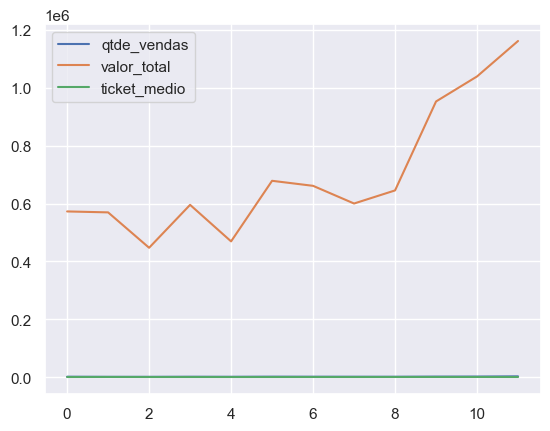

In [51]:
df_vendas_mes.plot()
plt.show()

### Ex. 21

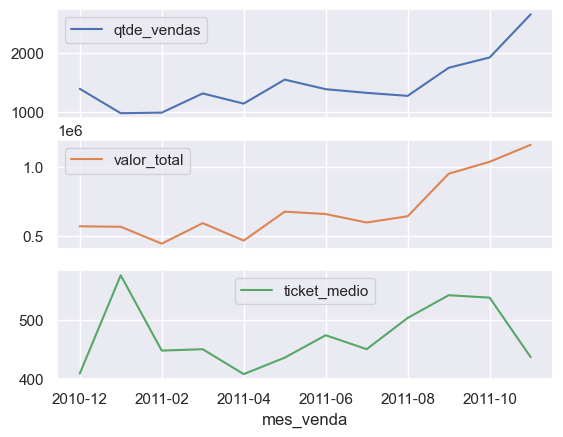

In [52]:
df_vendas_mes.plot(subplots=True, x='mes_venda')
plt.show()

### Ex. 22

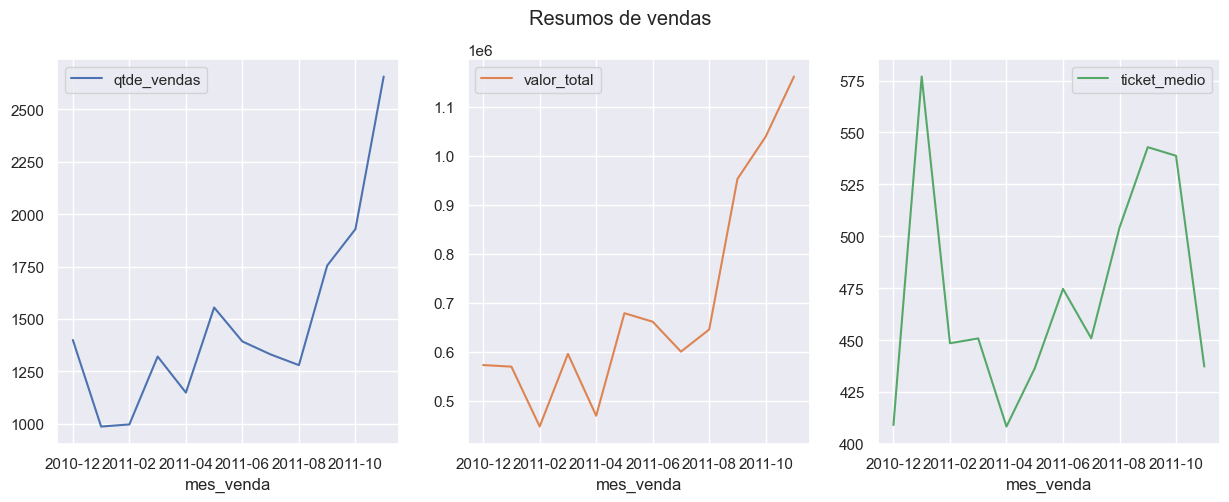

In [53]:
df_vendas_mes.plot(subplots=True, x='mes_venda', layout=(1,3), figsize=(15,5), title='Resumos de vendas')
plt.show()

### Ex. 23

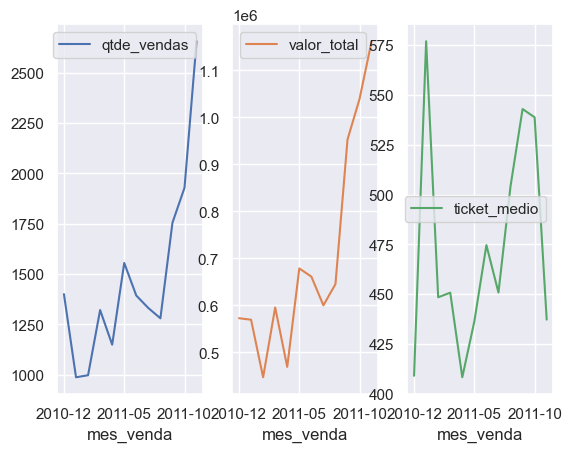

In [54]:
df_vendas_mes.plot(subplots=True, x='mes_venda',
                   layout=(1,3))
plt.show()

### Ex. 24

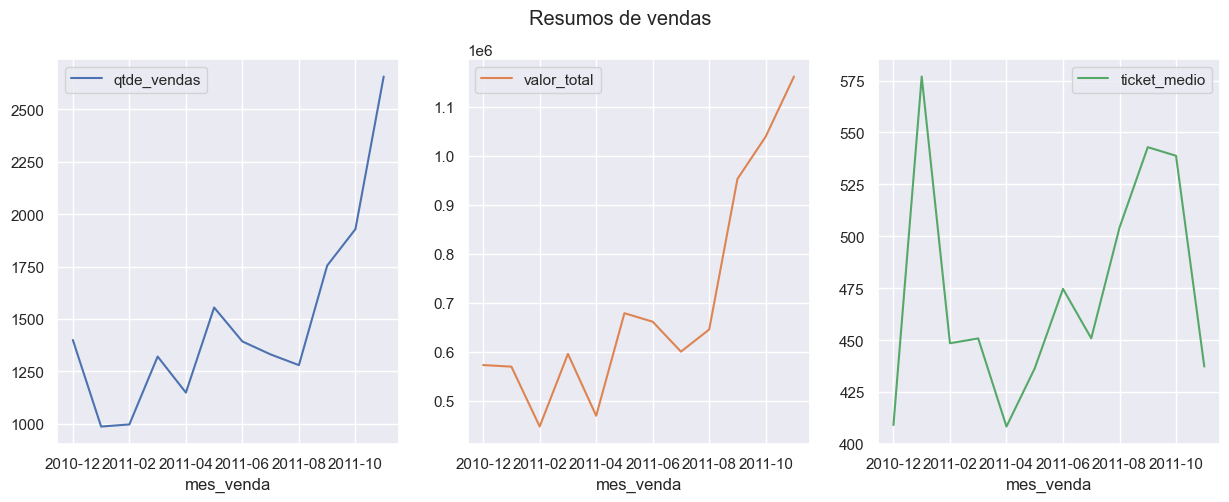

In [55]:
df_vendas_mes.plot(subplots=True, x='mes_venda', layout=(1,3), figsize=(15,5), title='Resumos de vendas')
plt.show()

### Ex. 25

C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\1981292333.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(df_vendas_mes['mes_venda'], rotation=90)
C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\1981292333.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)
C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\1981292333.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(df_vendas_mes['mes_venda'], rotation=90)


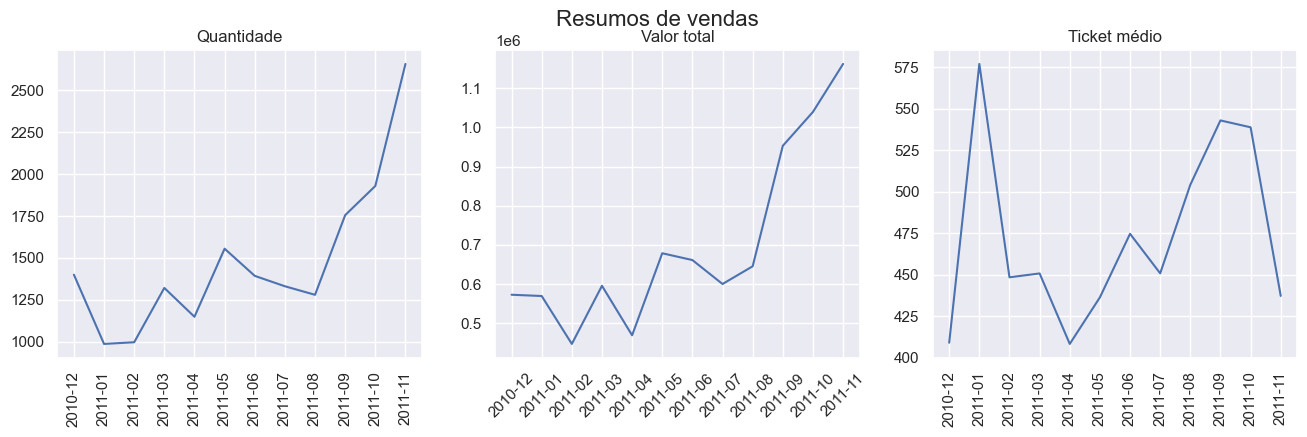

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Resumos de vendas', fontsize=16)
axes[0].plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'])
axes[0].set_title("Quantidade")
axes[0].set_xticklabels(df_vendas_mes['mes_venda'], rotation=90)

axes[1].plot(df_vendas_mes['mes_venda'], df_vendas_mes['valor_total'])
axes[1].set_title("Valor total")
axes[1].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)

axes[2].plot(df_vendas_mes['mes_venda'], df_vendas_mes['ticket_medio'])
axes[2].set_title("Ticket médio")
axes[2].set_xticklabels(df_vendas_mes['mes_venda'], rotation=90)
plt.show()

### Ex. 26

C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\2431023008.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1][0].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)
C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\2431023008.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1][1].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)
C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\2431023008.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1][2].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)


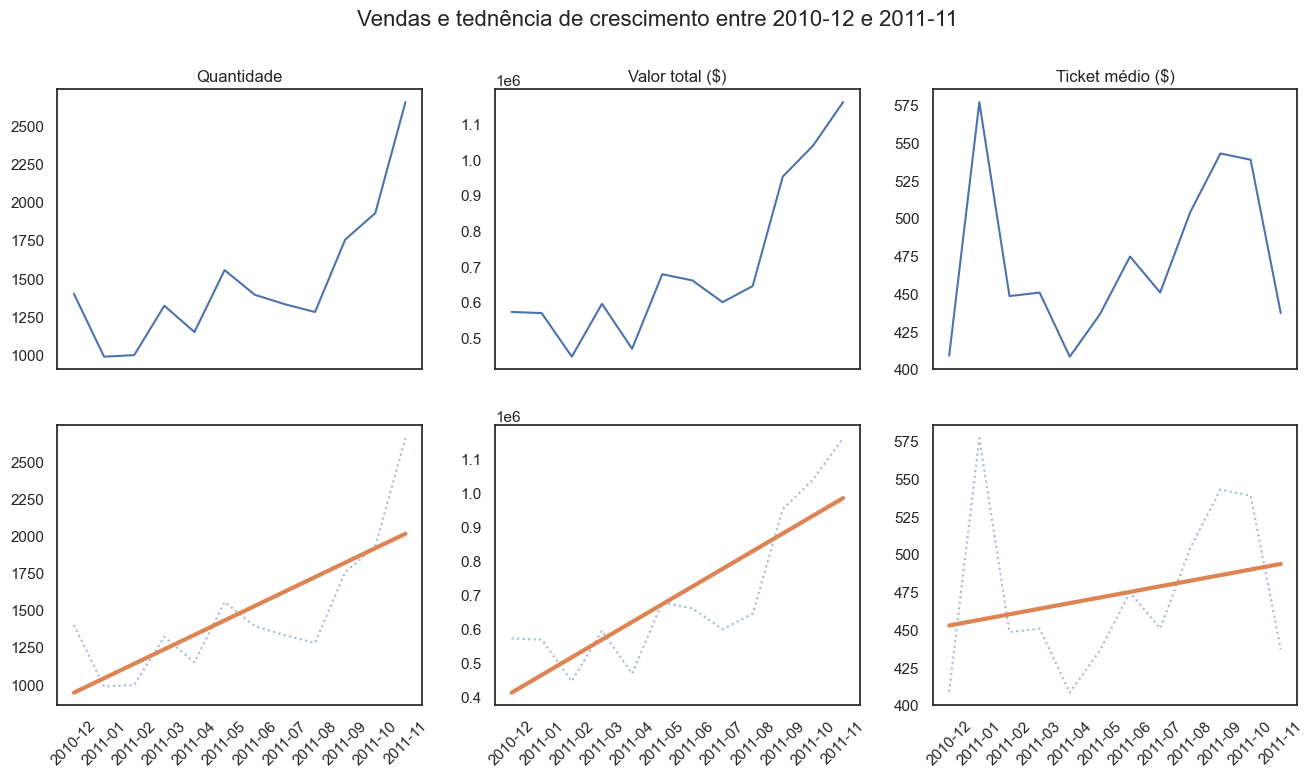

In [57]:
sns.set_style("white")

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle('Vendas e tednência de crescimento entre 2010-12 e 2011-11', fontsize=16)
axes[0][0].plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'])
axes[0][0].set_title('Quantidade')
axes[0][0].set_xticklabels([])

axes[0][1].plot(df_vendas_mes['valor_total'])
axes[0][1].set_title('Valor total ($)')
axes[0][1].set_xticklabels([])


axes[0][2].plot(df_vendas_mes['mes_venda'], df_vendas_mes['ticket_medio'])
axes[0][2].set_title("Ticket médio ($)")
axes[0][2].set_xticklabels([])


x, y = range(1,13), df_vendas_mes['qtde_vendas']
z = np.polyfit(x, df_vendas_mes['qtde_vendas'], 1)
p = np.poly1d(z)
axes[1][0].plot(df_vendas_mes['mes_venda'], df_vendas_mes['qtde_vendas'], ls=':', alpha=.5, label='Qtde. Vendas')
axes[1][0].plot(p(x), linewidth = 3, label='Tendência')
axes[1][0].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)


x, y = range(0,12), df_vendas_mes['valor_total']
z = np.polyfit(x, df_vendas_mes['valor_total'], 1)
p = np.poly1d(z)
axes[1][1].plot(df_vendas_mes['mes_venda'], df_vendas_mes['valor_total'], ls=':', alpha=.5, label='Valor total')
axes[1][1].plot(p(x), linewidth = 3, label='Tendência')
axes[1][1].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)

x, y = range(0,12), df_vendas_mes['ticket_medio']
z = np.polyfit(x, df_vendas_mes['ticket_medio'], 1)
p = np.poly1d(z)
axes[1][2].plot(df_vendas_mes['mes_venda'], df_vendas_mes['ticket_medio'], ls=':', alpha=.5, label='Ticket')
axes[1][2].plot(p(x), linewidth = 3, label='Tendência')
axes[1][2].set_xticklabels(df_vendas_mes['mes_venda'], rotation=45)

plt.show()

### Ex. 27

In [58]:
df_vendas_pais = df_vendas.groupby(['cliente_pais'])\
    .agg({'valor_venda': ['count', np.sum]})\
    .reset_index()
df_vendas_pais.columns = ['pais', 'qtde_vendas', 'valor_total']
df_vendas_pais

C:\Users\ronal\AppData\Local\Temp\ipykernel_32112\3006992818.py:2: FutureWarning: The provided callable <function sum at 0x0000012A2A517560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .agg({'valor_venda': ['count', np.sum]})\


,pais,qtde_vendas,valor_total
0,Australia,57,138521.310
1,Austria,16,9515.480
2,Bahrain,2,548.400
3,Belgium,94,39778.610
4,Brazil,1,1143.600
5,Canada,6,3666.380
6,Channel Islands,25,20252.040
7,Cyprus,16,13590.380
8,Czech Republic,2,826.740
9,Denmark,17,18786.440


### Ex. 28

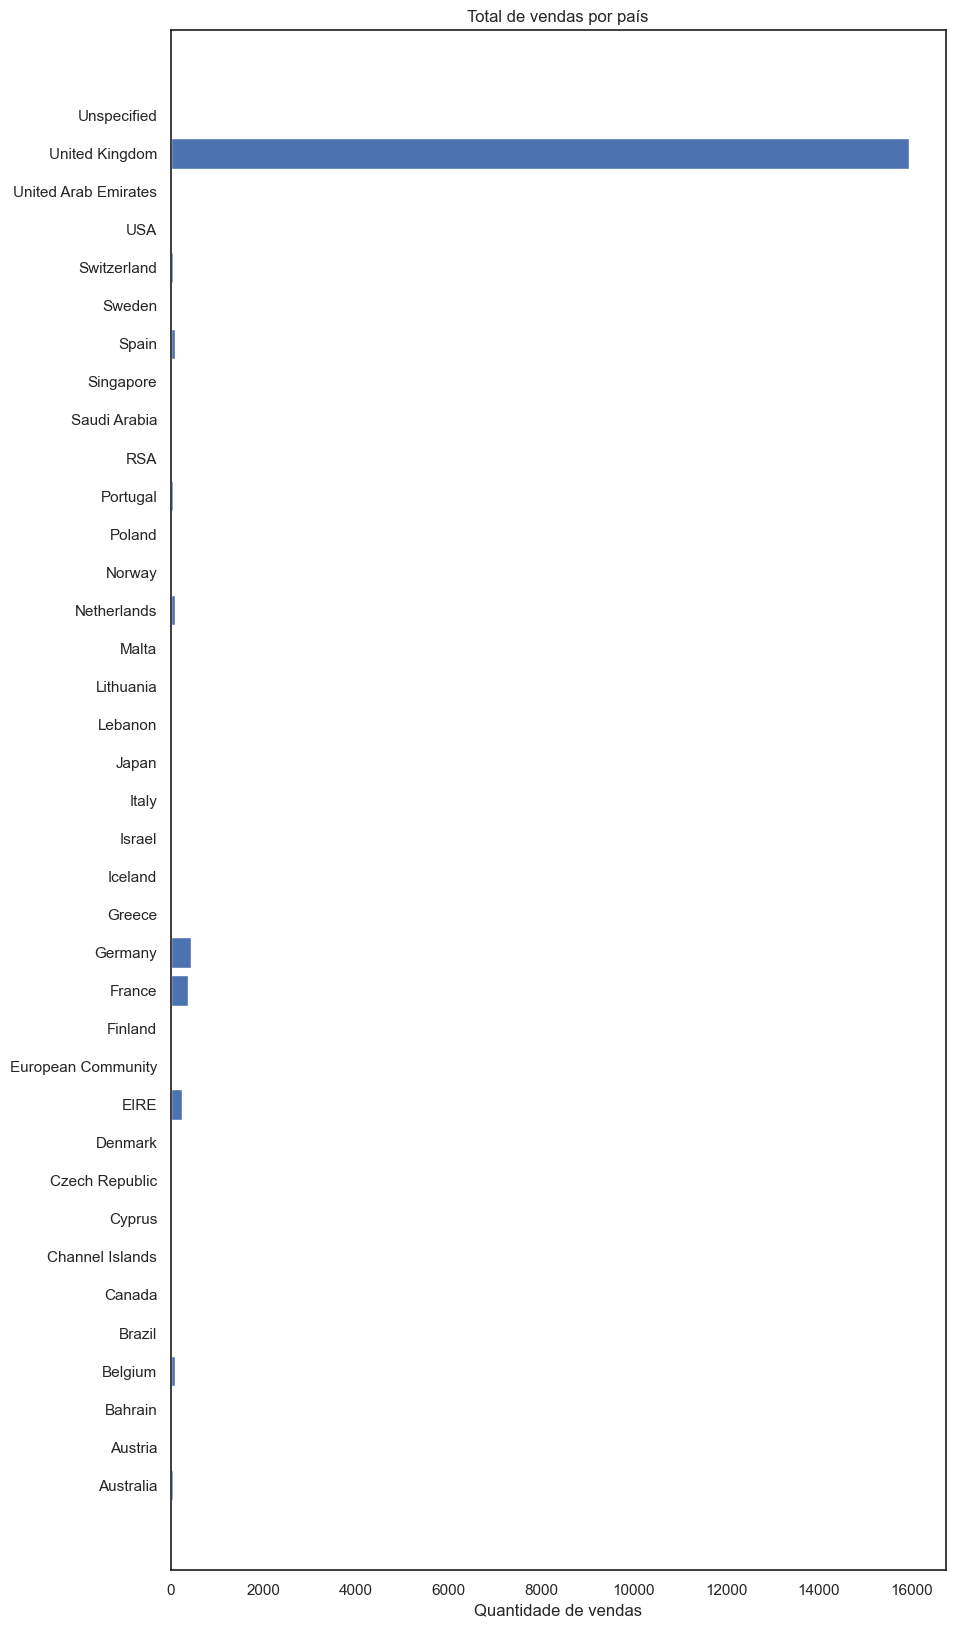

In [59]:
plt.figure(figsize=(10, 20))
plt.title('Total de vendas por país')
plt.xlabel('Quantidade de vendas')
# Gráfico de barras
plt.barh(df_vendas_pais['pais'], df_vendas_pais['qtde_vendas'],)
plt.show()

### Ex. 29

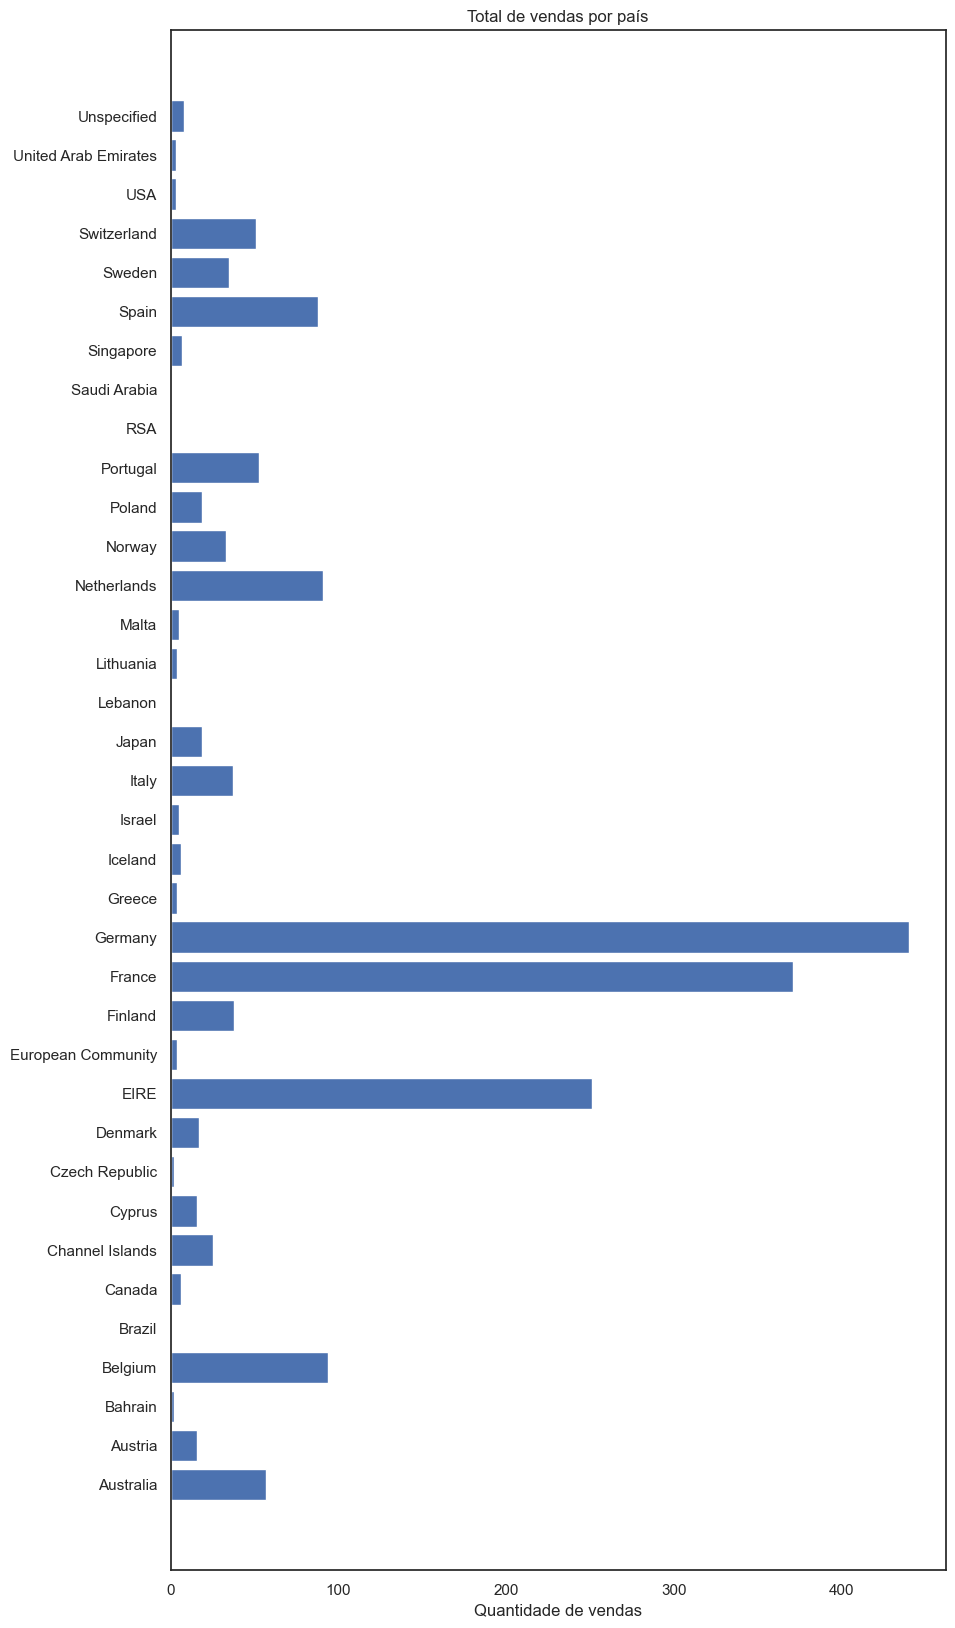

In [60]:
# Filtro
df_vendas_pais = df_vendas_pais[df_vendas_pais['pais']!='United Kingdom']

plt.figure(figsize=(10, 20))
plt.title('Total de vendas por país')
plt.xlabel('Quantidade de vendas')
# Gráfico de barras
plt.barh(df_vendas_pais['pais'], df_vendas_pais['qtde_vendas'],)
plt.show()

### Ex. 30

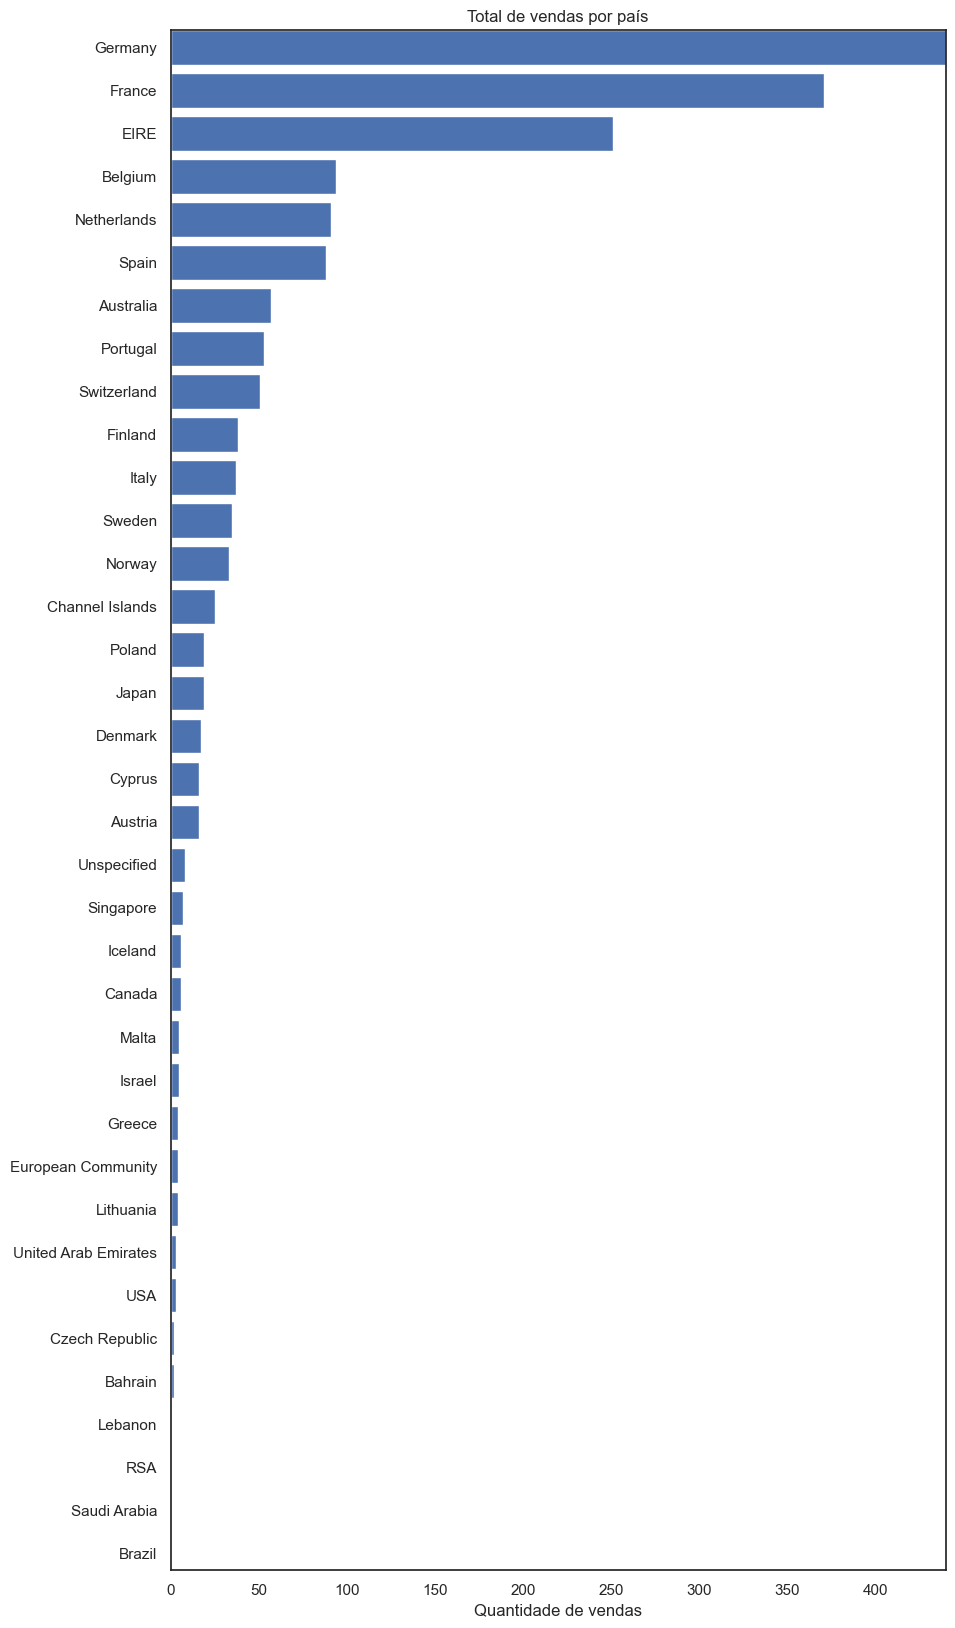

In [61]:
#Ordenando os dados
df_vendas_pais = df_vendas_pais.sort_values('qtde_vendas')
plt.figure(figsize=(10, 20))
plt.title('Total de vendas por país')
plt.xlabel('Quantidade de vendas')
# Gráfico de barras
plt.barh(df_vendas_pais['pais'], df_vendas_pais['qtde_vendas'],)
plt.margins(0,0)
plt.show()

### Ex. 31

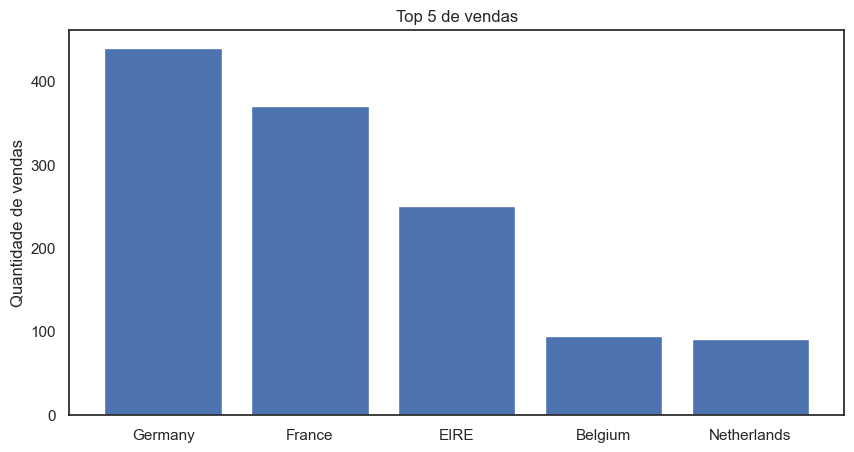

In [62]:
df_vendas_pais_top5 = df_vendas_pais[-5:]
df_vendas_pais_top5 = df_vendas_pais_top5.sort_values('qtde_vendas', ascending=False)

plt.figure(figsize=(10, 5))
plt.title('Top 5 de vendas')
plt.ylabel('Quantidade de vendas')
plt.bar(df_vendas_pais_top5['pais'], df_vendas_pais_top5['qtde_vendas'],)
plt.show()

### Ex. 32

In [63]:
df_vendas_mes_pais = df_vendas.groupby(['mes_venda', 'cliente_pais'])\
    .agg({'valor_venda':'count'})\
    .reset_index()
df_vendas_mes_pais.columns = ['mes_venda', 'pais', 'qtde_vendas']
df_vendas_mes_pais

,mes_venda,pais,qtde_vendas
0,2010-12,Australia,3
1,2010-12,Austria,1
2,2010-12,Belgium,5
3,2010-12,Channel Islands,1
4,2010-12,Cyprus,1
...,...,...,...
264,2011-11,Portugal,10
265,2011-11,Spain,14
266,2011-11,Sweden,5
267,2011-11,Switzerland,6


### Ex. 33

In [65]:
df_vendas_mes_pais_top5 = df_vendas_mes_pais[df_vendas_mes_pais['pais']\
    .isin(df_vendas_pais_top5['pais'])]
df_vendas_mes_pais_top5 = df_vendas_mes_pais_top5.sort_values(['mes_venda', 'pais'])
# Filtro de trimestre
df_vendas_mes_pais_top5_tri = \
    df_vendas_mes_pais_top5[df_vendas_mes_pais_top5['mes_venda']>='2011-09']
df_vendas_mes_pais_top5_tri

,mes_venda,pais,qtde_vendas
204,2011-09,Belgium,7
208,2011-09,EIRE,36
210,2011-09,France,45
211,2011-09,Germany,41
214,2011-09,Netherlands,7
225,2011-10,Belgium,11
230,2011-10,EIRE,31
232,2011-10,France,35
233,2011-10,Germany,58
238,2011-10,Netherlands,15


### Ex. 34

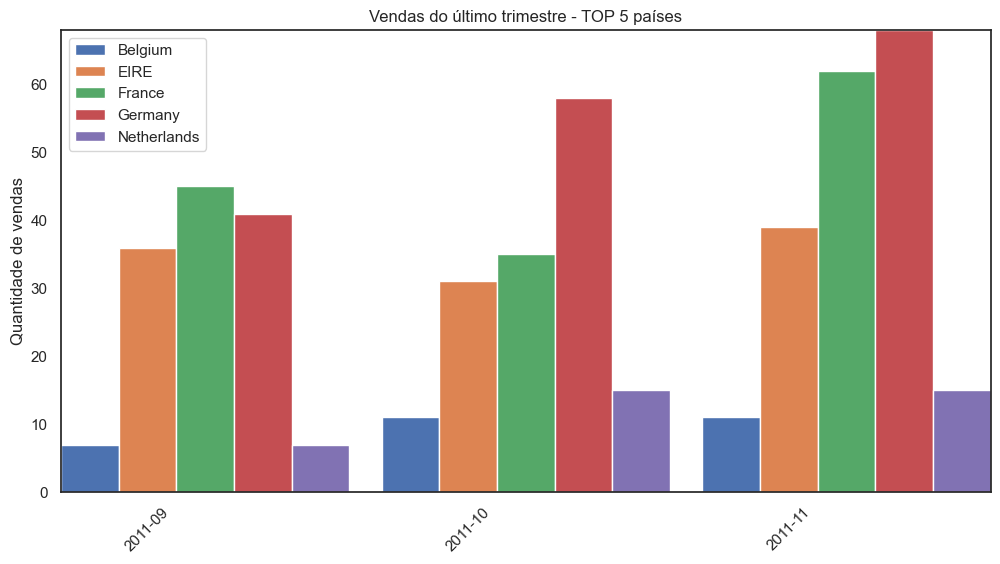

In [66]:
plt.figure(figsize=(12, 6))

barWidth = 0.18
x_pos = []
bar = []
meses = df_vendas_mes_pais_top5_tri['mes_venda'].unique()
paises = df_vendas_mes_pais_top5_tri['pais'].unique()
for i, pais in enumerate(paises):
    bar = df_vendas_mes_pais_top5_tri[df_vendas_mes_pais_top5_tri['pais']==pais]['qtde_vendas'].values
    if i==0:
        x_pos = np.arange(len(bar))
    else:
        x_pos = [x + barWidth for x in x_pos]
    plt.bar(x_pos, bar, width=barWidth, label=pais)
plt.xticks([r + barWidth for r in range(len(meses))], meses)
plt.xticks(rotation = 45)
plt.margins(0,0)
plt.title('Vendas do último trimestre - TOP 5 países')
plt.ylabel('Quantidade de vendas')
plt.legend()
plt.show()

### Ex. 35

In [67]:
data = {}
for pais in df_vendas_mes_pais_top5_tri['pais'].unique():
    data[pais] = df_vendas_mes_pais_top5_tri[df_vendas_mes_pais_top5_tri['pais']==pais]['qtde_vendas'].values
df_temp = pd.DataFrame(data, index=df_vendas_mes_pais_top5_tri['mes_venda'].unique())
df_temp

,Belgium,EIRE,France,Germany,Netherlands
2011-09,7,36,45,41,7
2011-10,11,31,35,58,15
2011-11,11,39,62,68,15


### Ex. 36

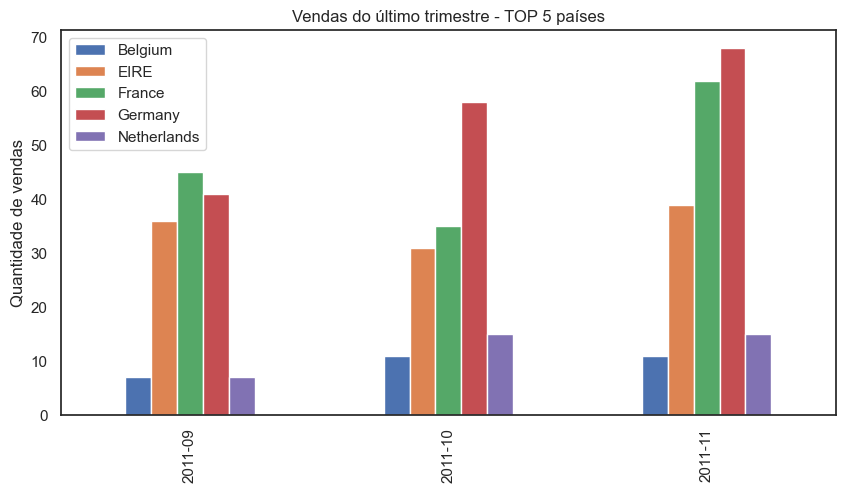

In [68]:
df_temp.plot(figsize=(10,5), kind='bar')
plt.title('Vendas do último trimestre - TOP 5 países')
plt.ylabel('Quantidade de vendas')
plt.show()

### Ex. 37

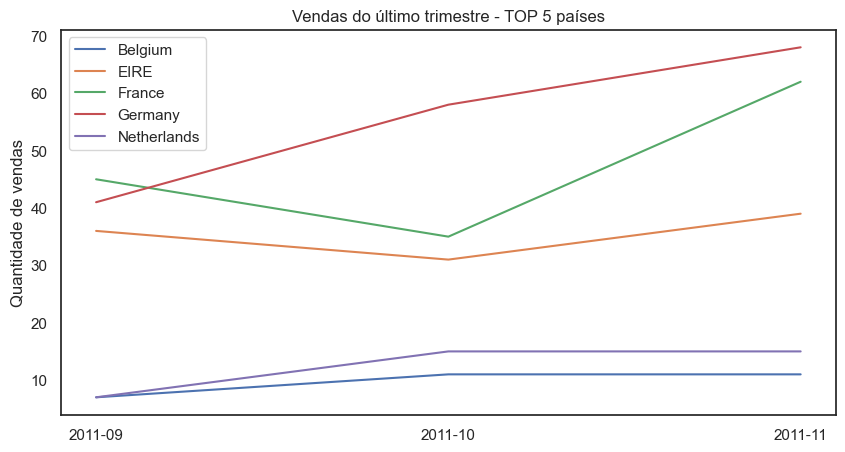

In [69]:
df_temp.plot(figsize=(10,5))
plt.title('Vendas do último trimestre - TOP 5 países')
plt.ylabel('Quantidade de vendas')
plt.show()

### Ex. 38

In [70]:
paises_top_10 = df_vendas_pais[df_vendas_pais['qtde_vendas']<100].sort_values(['qtde_vendas'], ascending=False)[:10]
paises_top_10

,pais,qtde_vendas,valor_total
3,Belgium,94,39778.61
23,Netherlands,91,273718.32
30,Spain,88,61260.90
0,Australia,57,138521.31
26,Portugal,53,30631.70
32,Switzerland,51,56443.95
12,Finland,38,21313.32
18,Italy,37,17282.79
31,Sweden,35,38140.33
24,Norway,33,33379.74


### Ex. 39

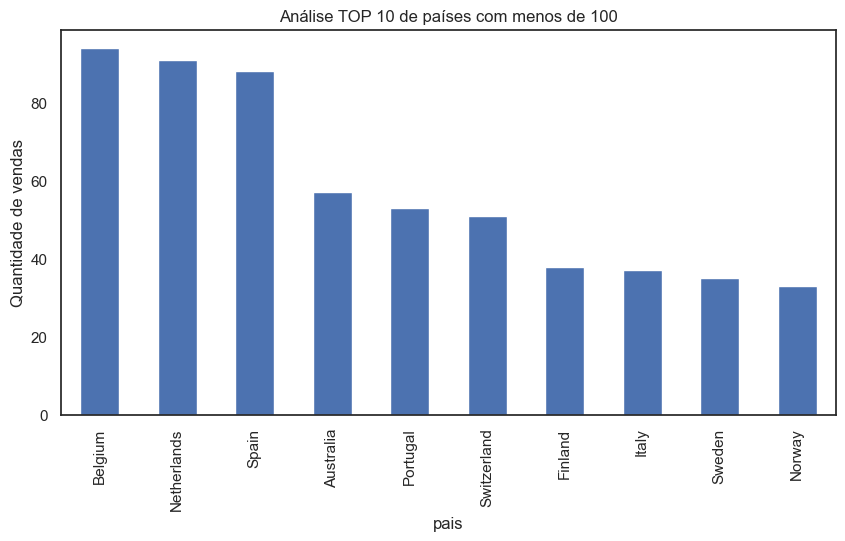

In [71]:
paises_top_10.plot(x='pais', y='qtde_vendas', kind='bar', figsize=(10,5), legend=False)
plt.title('Análise TOP 10 de países com menos de 100')
plt.ylabel('Quantidade de vendas')
plt.show()

### Ex. 40

In [72]:
df_top_10_tri = df_vendas_mes_pais[(df_vendas_mes_pais['pais'].isin(paises_top_10['pais'])) & \
                                     (df_vendas_mes_pais['mes_venda'] >= '2011-09')]
print(df_top_10_tri.shape)
df_top_10_tri

(30, 3)


,mes_venda,pais,qtde_vendas
203,2011-09,Australia,8
204,2011-09,Belgium,7
209,2011-09,Finland,4
212,2011-09,Italy,1
214,2011-09,Netherlands,7
215,2011-09,Norway,6
217,2011-09,Portugal,3
218,2011-09,Spain,8
219,2011-09,Sweden,3
220,2011-09,Switzerland,7


### Ex. 41

In [73]:
data = {}
for pais in df_top_10_tri['pais'].unique():
    data[pais] = df_top_10_tri[df_top_10_tri['pais']==pais]['qtde_vendas'].values
df_temp = pd.DataFrame(data, index=df_top_10_tri['mes_venda'].unique())
df_temp

,Australia,Belgium,Finland,Italy,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland
2011-09,8,7,4,1,7,6,3,8,3,7
2011-10,4,11,6,7,15,7,9,8,3,6
2011-11,6,11,8,9,15,5,10,14,5,6


### Ex. 42

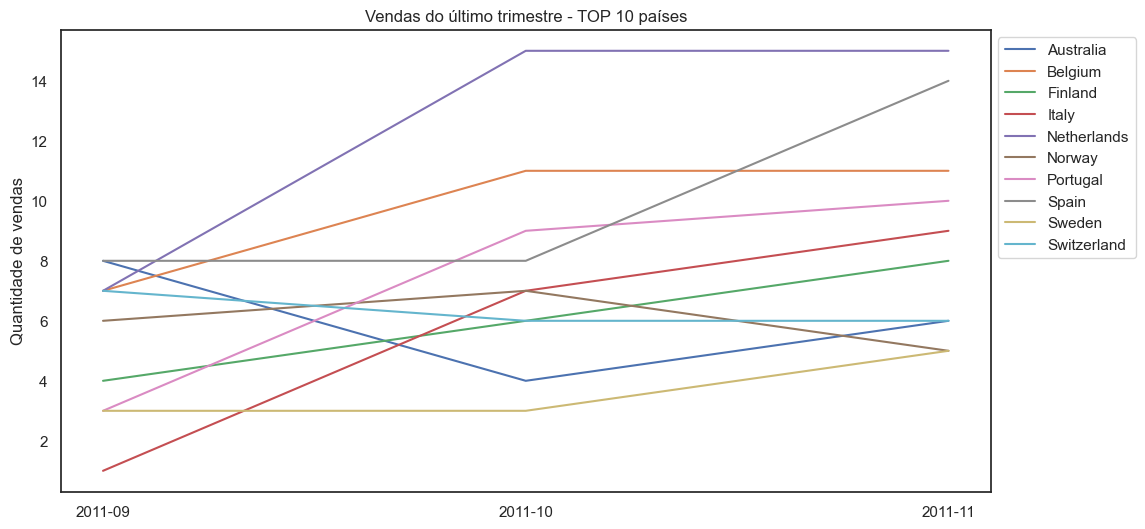

In [74]:
plt.figure(figsize=(12, 6))
for pais in df_temp.columns.values:
    plt.plot(df_temp.index.values, df_temp[pais], label=pais)
plt.title('Vendas do último trimestre - TOP 10 países')
plt.ylabel('Quantidade de vendas')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Ex. 43

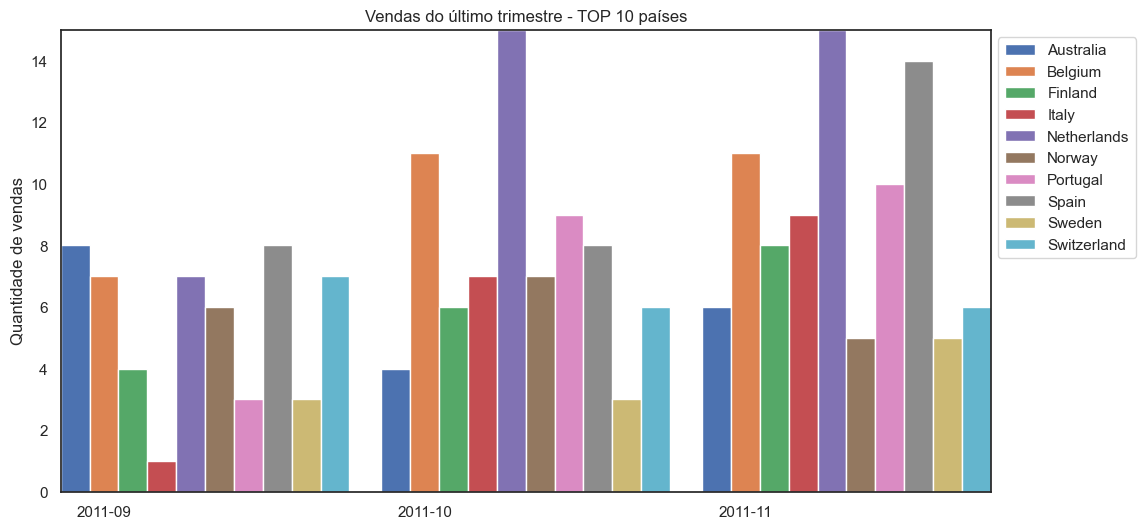

In [75]:
plt.figure(figsize=(12, 6))
barWidth = 0.09
x_pos = bar = []
meses = df_temp.index.values
paises = df_temp.columns.values
for i, pais in enumerate(paises):
    bar = df_temp[pais]
    if i==0:
        x_pos = np.arange(len(bar))
    else:
        x_pos = [x + barWidth for x in x_pos]
    plt.bar(x_pos, bar, width=barWidth, label=pais)
plt.xticks([r + barWidth for r in range(len(meses))], meses)
#plt.xticks(rotation = 45)
plt.margins(0,0)
plt.title('Vendas do último trimestre - TOP 10 países')
plt.ylabel('Quantidade de vendas')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()